ReLU（rectified linear unit）函数提供了一个很简单的非线性变换。给定元素xx，该函数定义为

\text{ReLU}(x) = \max(x, 0).ReLU(x)=max(x,0).
可以看出，ReLU函数只保留正数元素，并将负数元素清零。为了直观地观察这一非线性变换，我们先定义一个绘图函数xyplot。

In [1]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l

def xyplot(x_vals, y_vals, name):
    d2l.set_figsize(figsize=(5, 2.5))
    d2l.plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')

我们接下来通过Tensor提供的relu函数来绘制ReLU函数。可以看到，该激活函数是一个两段线性函数。

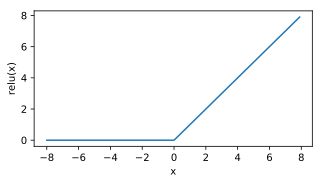

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')

显然，当输入为负数时，ReLU函数的导数为0；当输入为正数时，ReLU函数的导数为1。尽管输入为0时ReLU函数不可导，但是我们可以取此处的导数为0。下面绘制ReLU函数的导数。

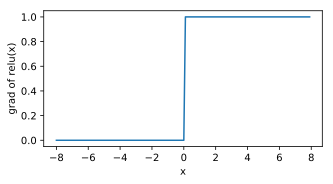

In [3]:
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

sigmoid函数可以将元素的值变换到0和1之间：
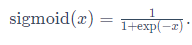
sigmoid函数在早期的神经网络中较为普遍，但它目前逐渐被更简单的ReLU函数取代。在后面“循环神经网络”一章中我们会介绍如何利用它值域在0到1之间这一特性来控制信息在神经网络中的流动。下面绘制了sigmoid函数。当输入接近0时，sigmoid函数接近线性变换。

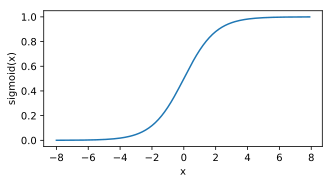

In [4]:
y = x.sigmoid()
xyplot(x, y, 'sigmoid')

依据链式法则，sigmoid函数的导数

下面绘制了sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0。

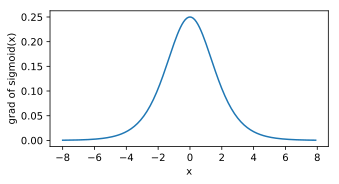

In [5]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

tanh（双曲正切）函数可以将元素的值变换到-1和1之间：
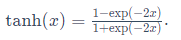
我们接着绘制tanh函数。当输入接近0时，tanh函数接近线性变换。虽然该函数的形状和sigmoid函数的形状很像，但tanh函数在坐标系的原点上对称。

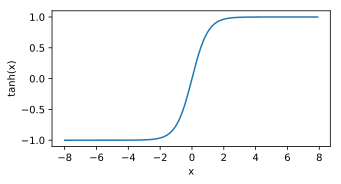

In [6]:
y = x.tanh()
xyplot(x, y, 'tanh')

依据链式法则，tanh函数的导数
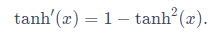
下面绘制了tanh函数的导数。当输入为0时，tanh函数的导数达到最大值1；当输入越偏离0时，tanh函数的导数越接近0。

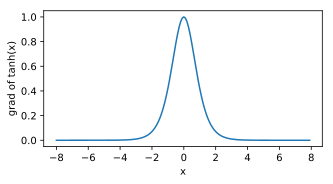

In [7]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')

多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。以单隐藏层为例并沿用本节之前定义的符号，多层感知机按以下方式计算输出：
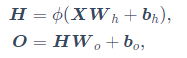

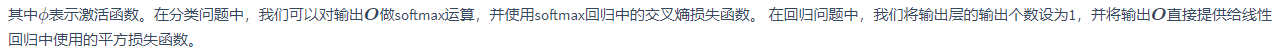